In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install -U fbprophet

Requirement already up-to-date: fbprophet in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.6)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
bmarks = pd.read_excel("Copy of medm 2707.xlsx")

In [5]:
bid = bmarks[['Inserted Date']].copy()
bid['count'] = 1
bid.set_index('Inserted Date', inplace=True)

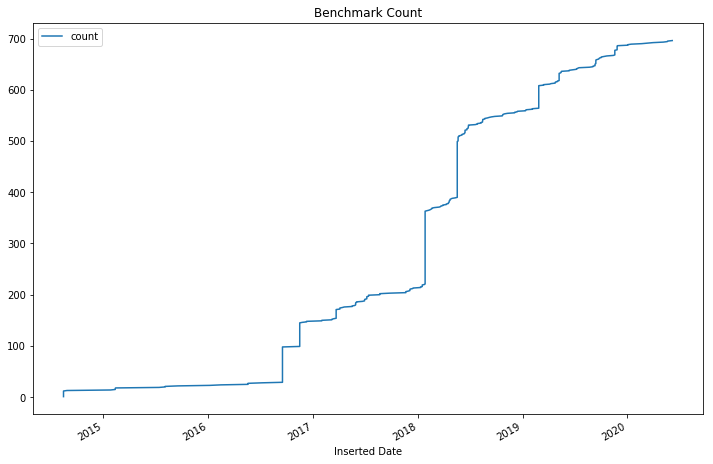

In [6]:
bid.sort_index().cumsum().plot(figsize=(12,8),title='Benchmark Count')

In [7]:
bid2 = bid.sort_index().cumsum()

In [8]:
bid_group = bmarks.groupby(bmarks['Inserted Date'].dt.year).agg('count')

In [9]:
bid_group.shape

(7, 52)

In [10]:
bid_year = bid_group['Benchmark Id'].rename(columns={"Benchmark Id": "Count"})
bid_year

Inserted Date
2014     13
2015      9
2016    126
2017     65
2018    345
2019    128
2020     10
dtype: int64

In [11]:
bid_year = bid_group['Benchmark Id'].rename(columns={"Benchmark Id": "Count"})
bid_year

Inserted Date
2014     13
2015      9
2016    126
2017     65
2018    345
2019    128
2020     10
dtype: int64

In [12]:
bid_year = bid_year.reset_index()

In [13]:
bid2 = bid2.reset_index()

In [15]:
bid2.columns = ['ds', 'y']
bid2.head()

ds  y
0 2014-08-15 13:36:21  1
1 2014-08-15 13:36:21  2
2 2014-08-15 13:36:21  3
3 2014-08-15 13:36:21  4
4 2014-08-15 13:36:21  5

In [16]:
from fbprophet import Prophet

In [17]:
m = Prophet()
m.fit(bid2)

In [18]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1056 2021-06-01 17:15:49.567
1057 2021-06-02 17:15:49.567
1058 2021-06-03 17:15:49.567
1059 2021-06-04 17:15:49.567
1060 2021-06-05 17:15:49.567

In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower  yhat_upper
1056 2021-06-01 17:15:49.567  874.139001  819.212558  926.821502
1057 2021-06-02 17:15:49.567  866.286594  812.900141  919.836260
1058 2021-06-03 17:15:49.567  872.374093  816.502922  927.886282
1059 2021-06-04 17:15:49.567  857.800447  802.711591  908.039058
1060 2021-06-05 17:15:49.567  823.666946  767.005061  879.258837

In [20]:
forecast2 = m.predict(future)
forecast2[['ds', 'yhat']].tail()

ds        yhat
1056 2021-06-01 17:15:49.567  874.139001
1057 2021-06-02 17:15:49.567  866.286594
1058 2021-06-03 17:15:49.567  872.374093
1059 2021-06-04 17:15:49.567  857.800447
1060 2021-06-05 17:15:49.567  823.666946

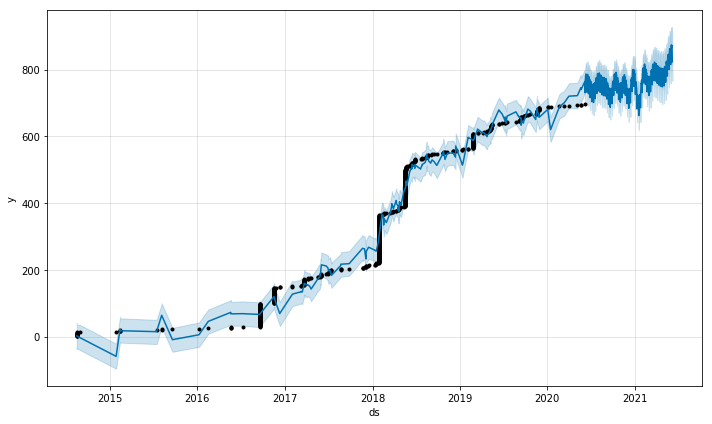

In [21]:
fig1 = m.plot(forecast)


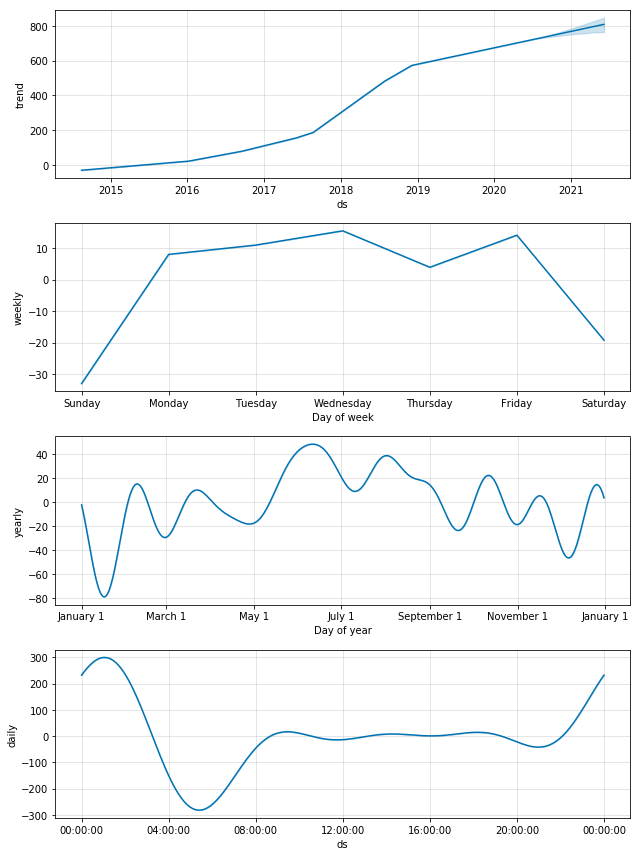

In [22]:
fig2 = m.plot_components(forecast)


In [23]:
import plotly

In [24]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)